# **Group I ML Project : CNN Based Group Member Classifier**

In [109]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [ ]:
# Define parameters
image_size = (200, 200)  
batch_size = 12
train_dir = "C:/Users/USER/Downloads/Team-Member-Classification-using-CNN/dataset/Train"  
test_dir = "C:/Users/USER/Downloads/Team-Member-Classification-using-CNN/dataset/Test"  
AUTOTUNE = tf.data.AUTOTUNE

In [111]:
train_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size
)

Found 1145 files belonging to 8 classes.
Using 916 files for training.
Found 1145 files belonging to 8 classes.
Using 229 files for validation.
Found 40 files belonging to 8 classes.


In [112]:
class_names = train_ds.class_names
print(class_names)

['TrainDewang', 'TrainGaurav', 'TrainHitesh', 'TrainNarendra', 'TrainOmkar', 'TrainPranay', 'TrainSaurabh', 'TrainVaishnavi']


In [113]:
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [125]:

model = models.Sequential([
    
    layers.Input(shape=(200, 200, 3)),  

    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
        # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    
    layers.Flatten(),

    
    layers.Dense(128, activation='relu'),

    
    layers.Dense(8, activation='softmax')  
])


model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,880,392 (7.17 MB)

 Trainable params: 1,880,392 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

In [126]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
              metrics=['accuracy'])

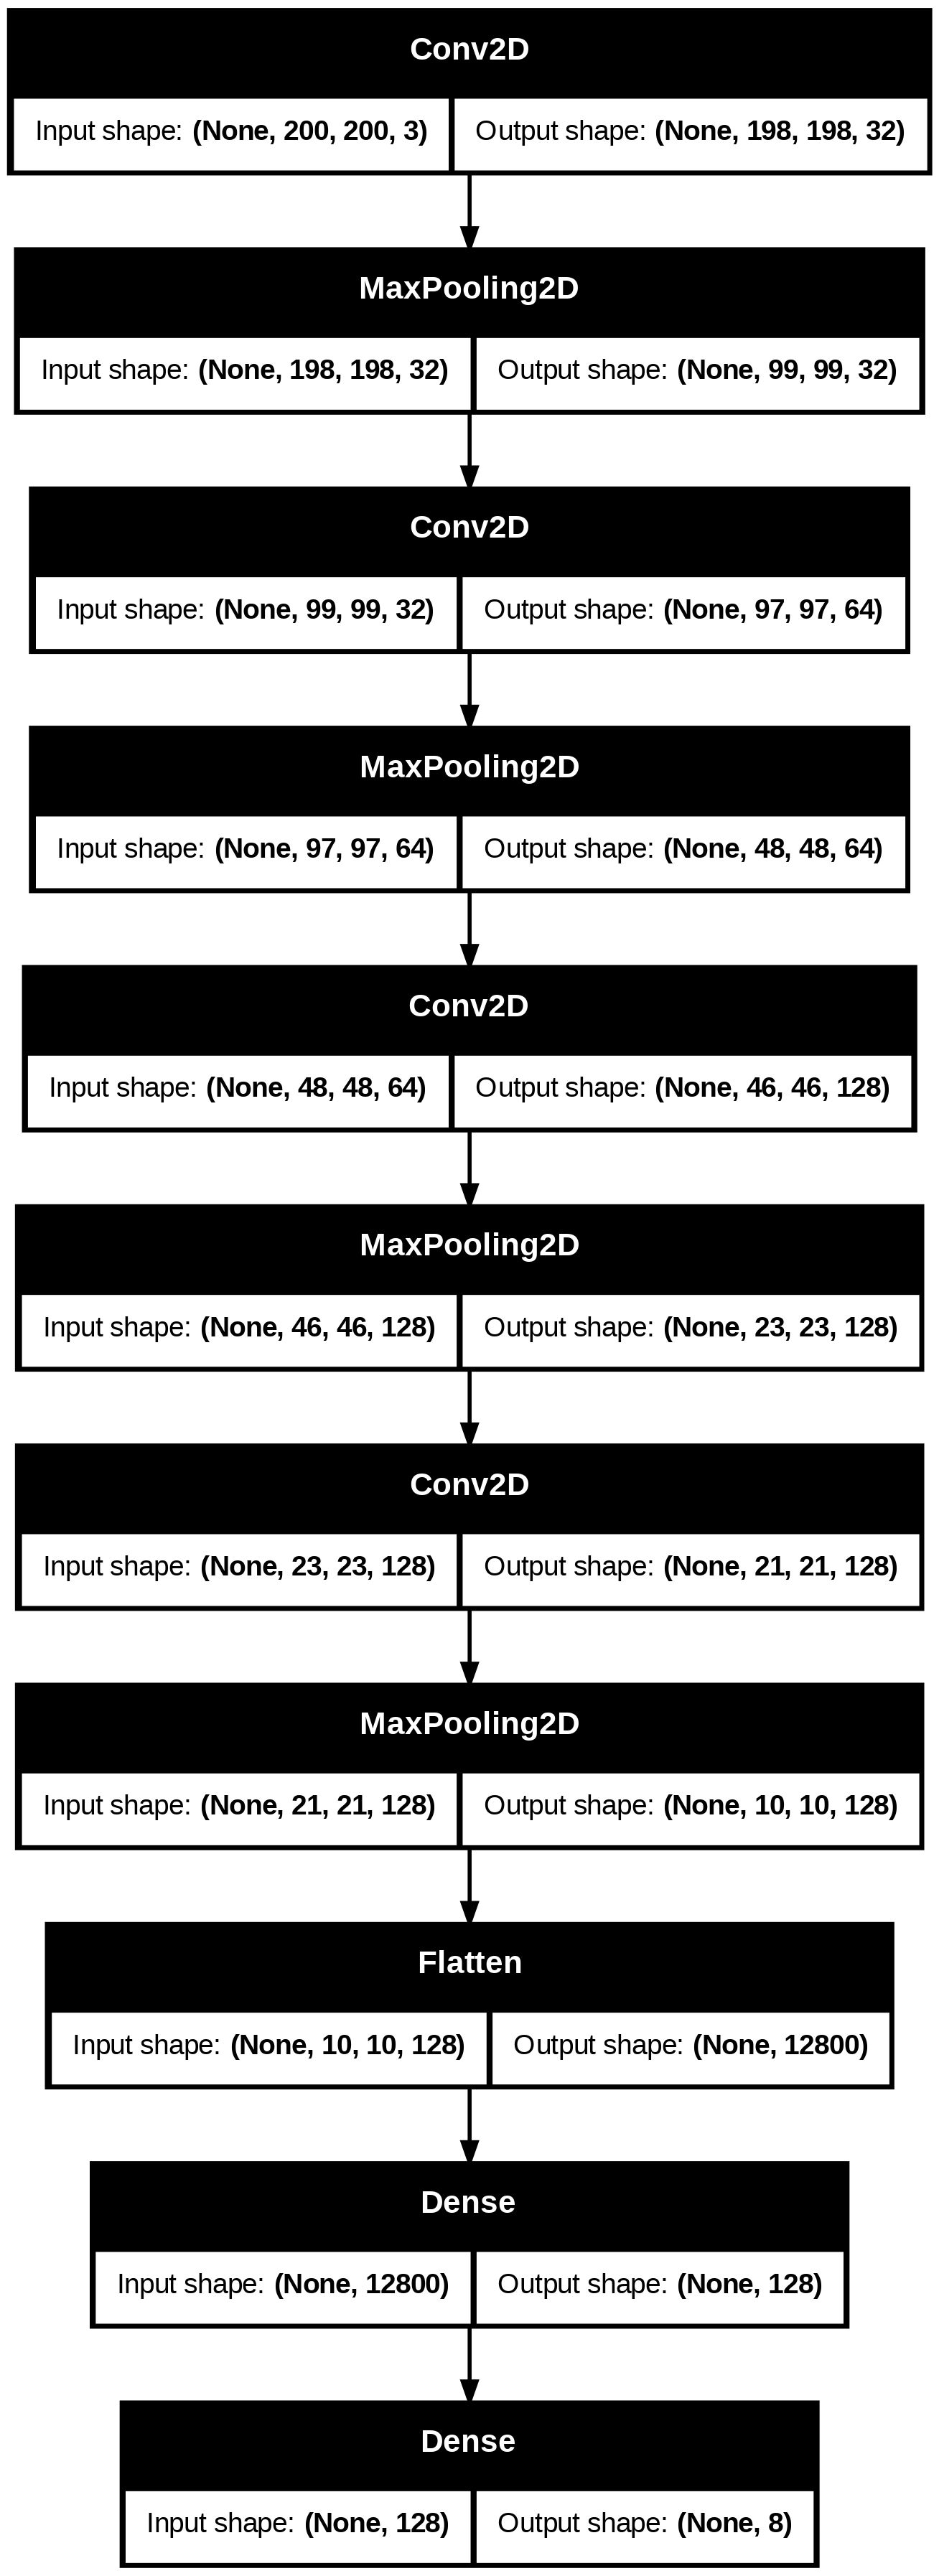

In [127]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
keras.utils.plot_model(model, show_shapes=True)

In [128]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50  
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.2410 - loss: 19.1631 - val_accuracy: 0.6463 - val_loss: 1.0567
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7240 - loss: 0.7541 - val_accuracy: 0.8908 - val_loss: 0.3965
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9312 - loss: 0.2457 - val_accuracy: 0.9563 - val_loss: 0.1583
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9634 - loss: 0.1088 - val_accuracy: 0.9039 - val_loss: 0.4583
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9503 - loss: 0.1252 - val_accuracy: 0.9694 - val_loss: 0.2058
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9687 - loss: 0.1172 - val_accuracy: 0.8996 - val_loss: 0.6166
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9578 - loss: 0.2044 - val_accuracy: 0.9825 - val_loss: 0.1776
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9828 - loss: 0.0402 - val_accuracy: 0.9651 - val_loss: 0

In [129]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.4417 - loss: 6.7736
Test accuracy: 0.5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


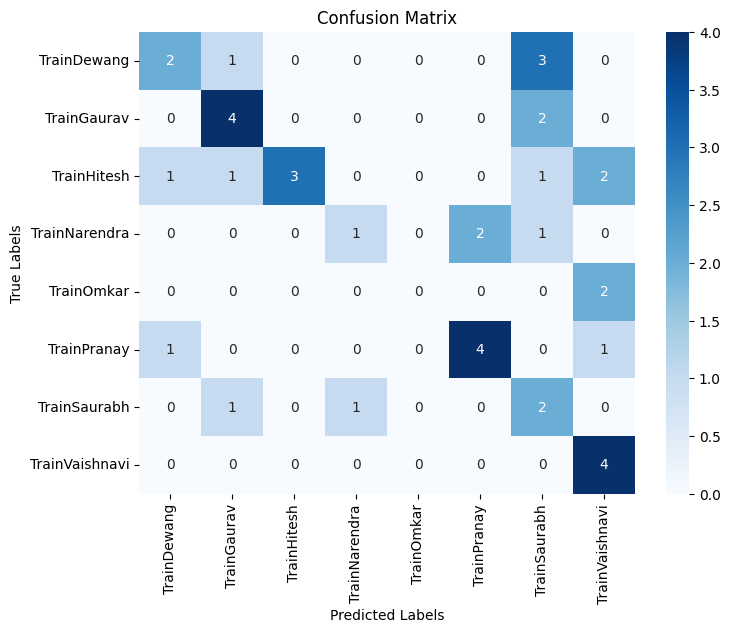

In [130]:
import os
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = sorted(os.listdir('/kaggle/input/final-cnn-images-clean/Train'))

predictions = np.argmax(model.predict(test_ds), axis=-1)
true_labels = np.concatenate([y for _, y in test_ds], axis=0)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


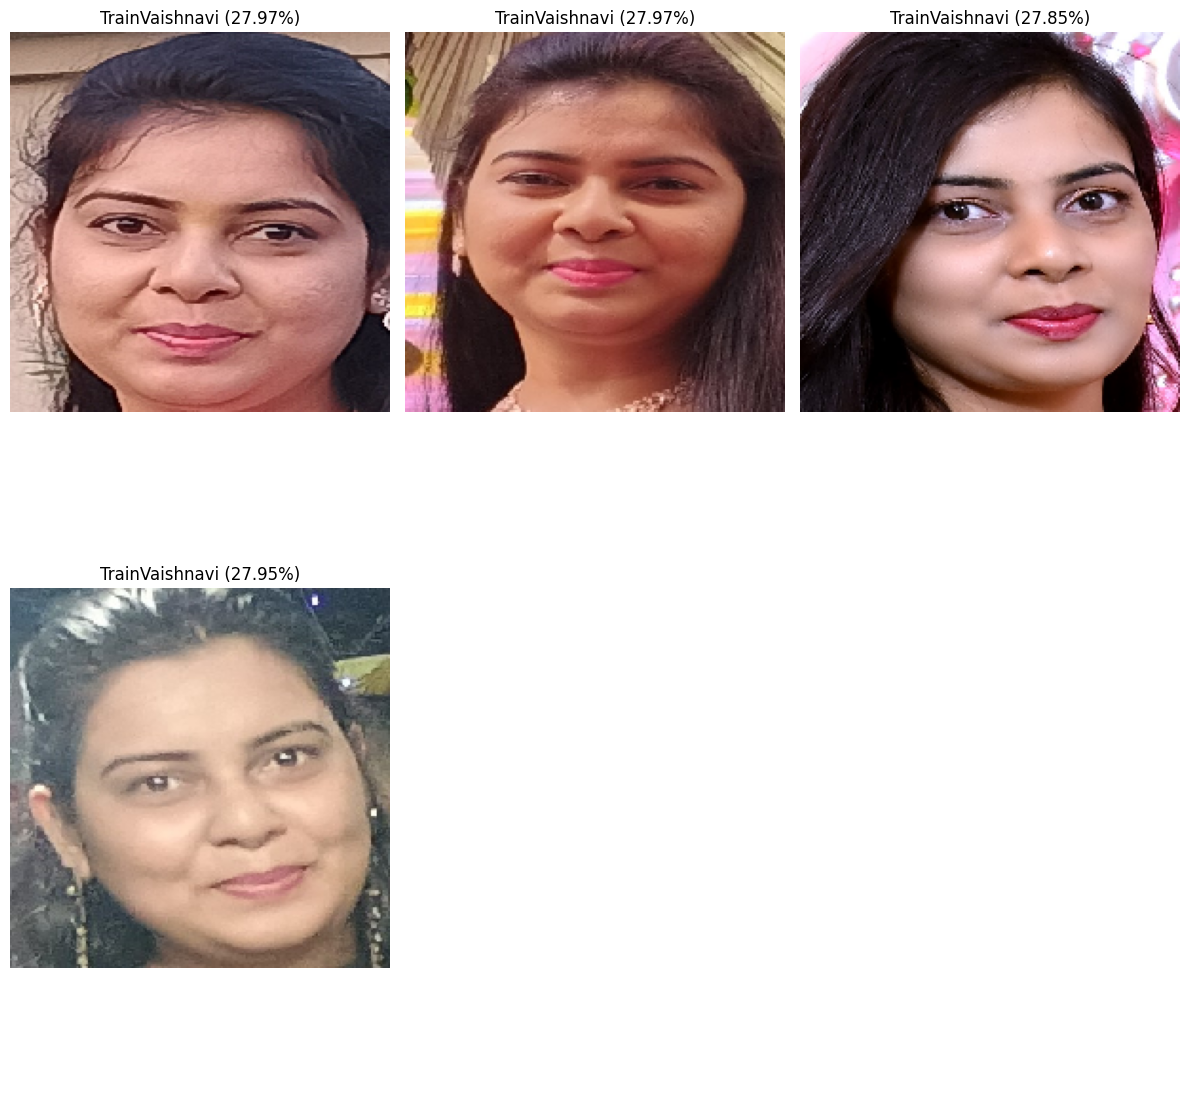

In [132]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img_height, img_width = 200, 200

folder_path = "/kaggle/input/final-cnn-images-clean/Test/TestVaishnavi"

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg'))]

images = []
predictions = []
labels = []

for img_file in image_files:

    img_path = os.path.join(folder_path, img_file)
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    

    img_array = tf.keras.utils.img_to_array(img)
    

    img_array = tf.expand_dims(img_array, 0)
    

    prediction = model.predict(img_array)
    

    score = tf.nn.softmax(prediction[0])
    

    predicted_class = class_names[np.argmax(score)]
    confidence_score = 100 * np.max(score)
    

    images.append(img)
    predictions.append(predicted_class)
    labels.append(confidence_score)

fig, axes = plt.subplots(len(images) // 3 + 1, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    if i < len(images):
        ax.imshow(images[i])
        ax.set_title(f"{predictions[i]} ({labels[i]:.2f}%)")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

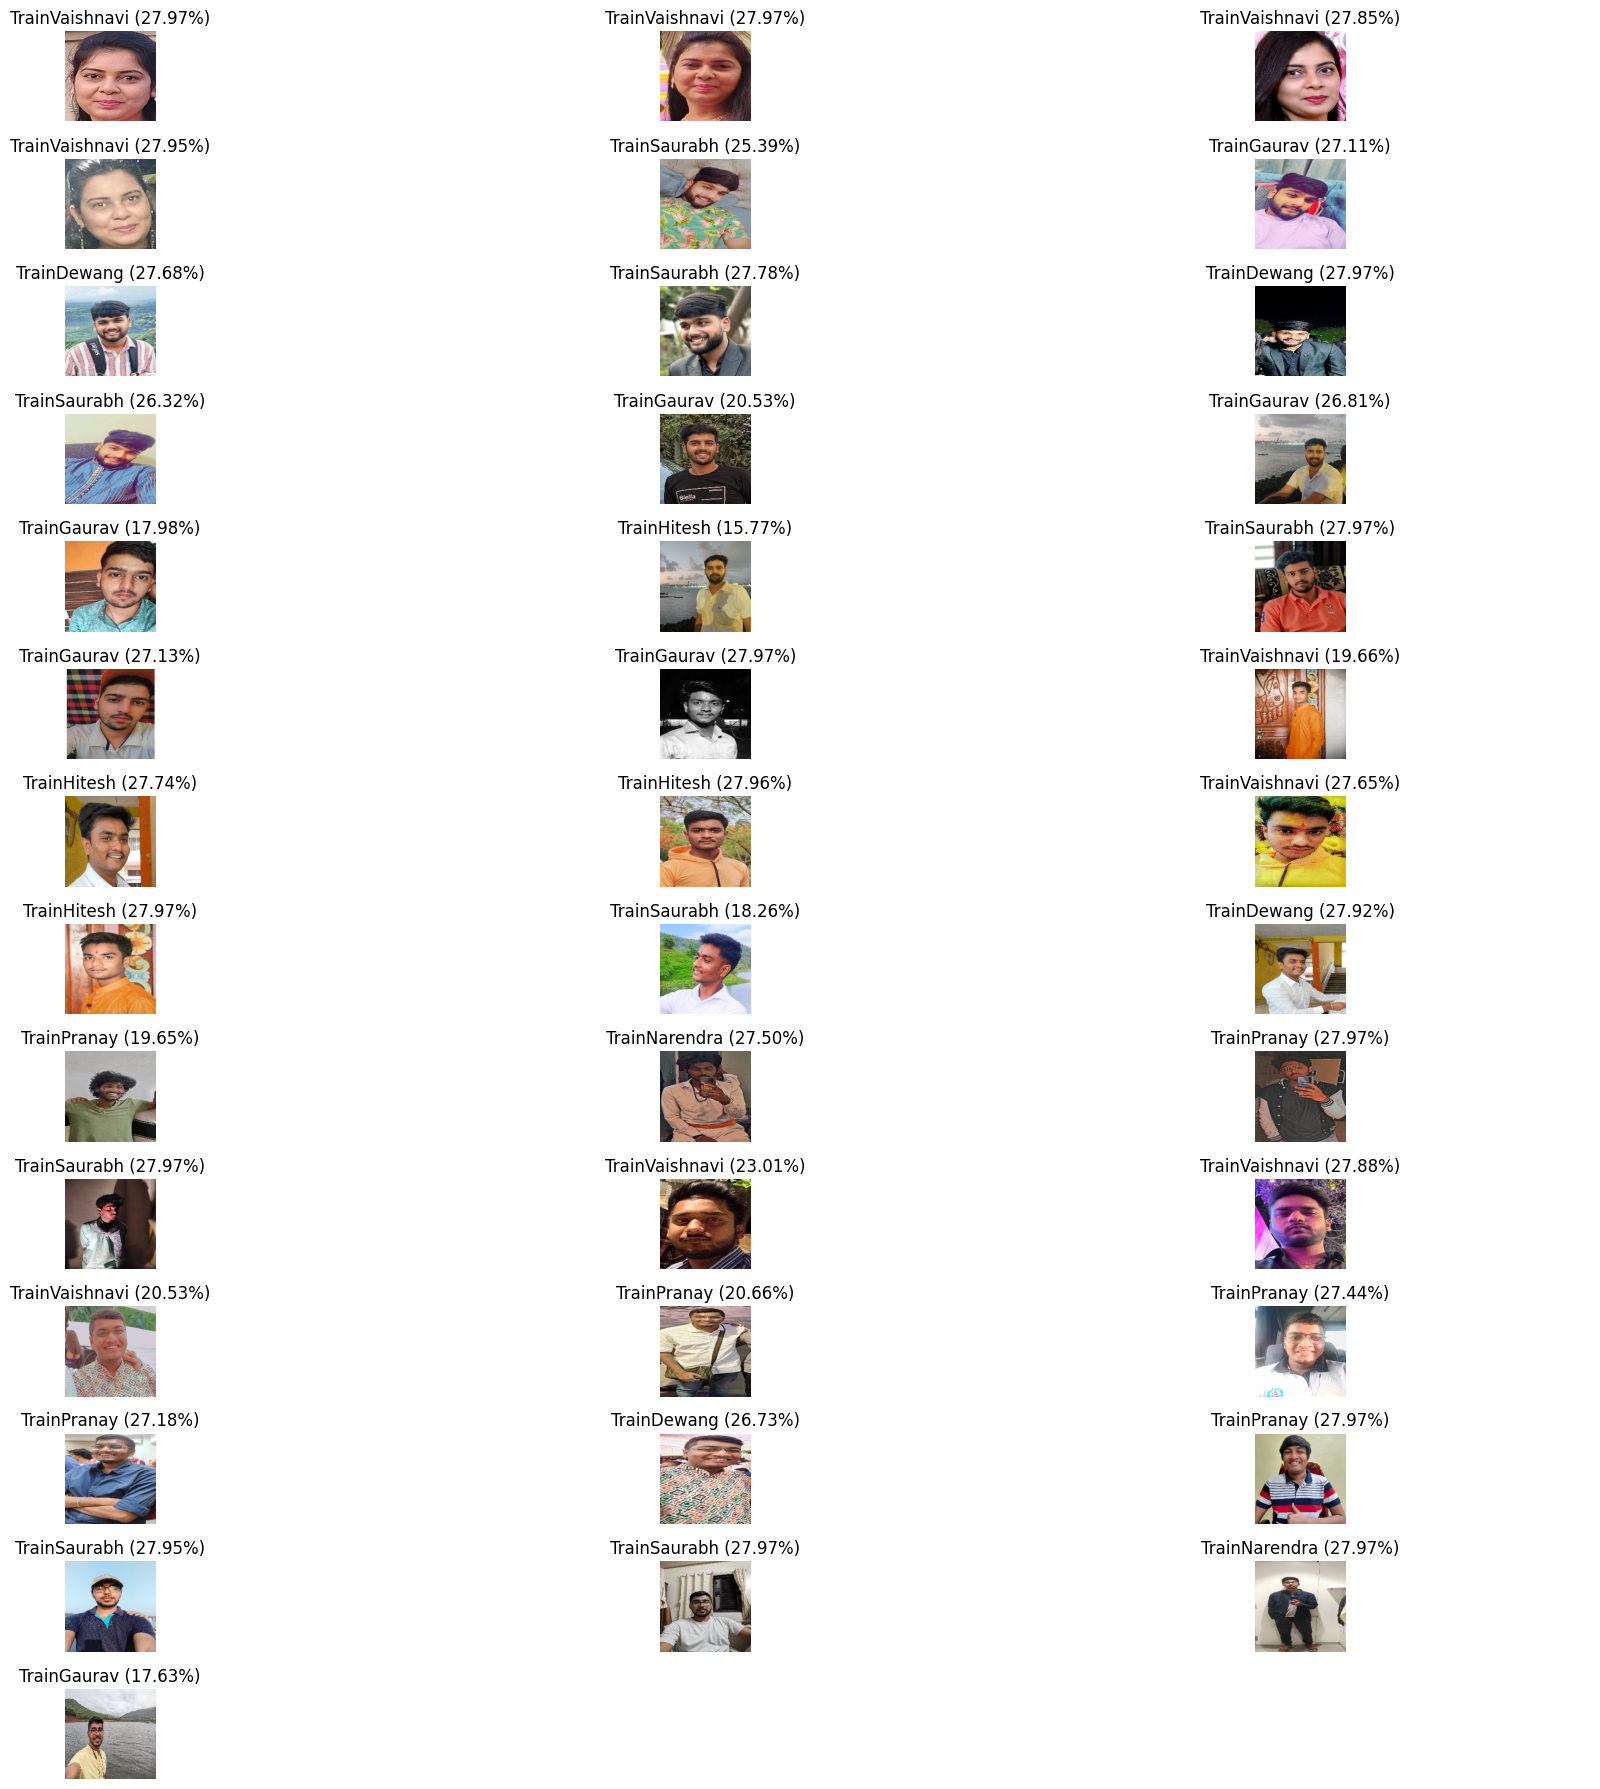

In [136]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img_height, img_width = 200, 200

root_folder_path = "/kaggle/input/final-cnn-images-clean/Test"

folder_names = ['TestVaishnavi', 'TestDewang', 'TestGaurav', 'TestHitesh', 'TestNarendra', 'TestOmkar', 'TestPranay', 'TestSaurabh']  # Add more folder names as needed

images = []
predictions = []
labels = []

for folder_name in folder_names:
    folder_path = os.path.join(root_folder_path, folder_name)
    

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg'))]


    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
        
    
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) 
        
    
        prediction = model.predict(img_array)
        score = tf.nn.softmax(prediction[0])
        
    
        predicted_class = class_names[np.argmax(score)]
        confidence_score = 100 * np.max(score)
        
    
        images.append(img)
        predictions.append(predicted_class)
        labels.append(confidence_score)

fig, axes = plt.subplots(len(images) // 3 + 1, 3, figsize=(18, 18))

for i, ax in enumerate(axes.flatten()):
    if i < len(images):
        ax.imshow(images[i])
        ax.set_title(f"{predictions[i]} ({labels[i]:.2f}%)")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


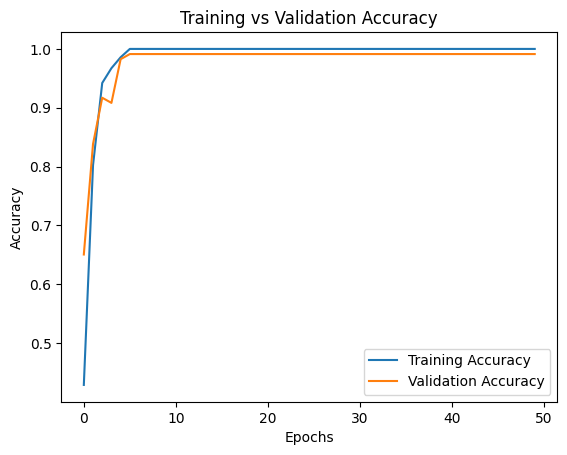

In [123]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
# model.save("CNN_model.h5")